In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [53]:
import pandas as pd
# voy a importar el abecedario para trabajar con letras 
# mayusculas uppercase
# minusculas lowercase
from string import ascii_uppercase as alfabeto
 
df = pd.read_csv('songs_normalize.csv', encoding='latin-1')

In [54]:
#Renombrar columnas
df = df.rename(columns={
    'artist':'Artista',
    'song':'Cancion',
    'duration_ms':'Duracion',
    'explicit':'Explicito',
    'year':'Año',
    'popularity':'Popularidad',
    'danceability':'Bailabilidad',
    'energy':'Energia',
    'key':'Clave',
    'loudness':'Volumen',
    'mode':'Modo',
    'speechiness':'Palabra_Hablada',
    'acousticness':'Acustica',
    'instrumentalness':'Instrumentalidad',
    'liveness':'Vivacidad',
    'valence':'Valencia',
    'tempo':'Tempo',
    'genre':'Genero'
})

In [55]:
# Convertir duración de ms a s y redondear con formato personalizado
df['Duracion'] = (df['Duracion'] / 1000).round().astype(int)

In [56]:
# Agrupar por género y calcular la duración promedio

summarized_data_genre_wise = df.groupby('Genero').agg(avg_duration=('Duracion', 'mean'))
summarized_data_genre_wise = summarized_data_genre_wise.round().astype(int)

# Ordenar por duración promedio en orden descendente
summarized_data_genre_wise = summarized_data_genre_wise.sort_values('avg_duration', ascending=False)

# Mostrar el DataFrame resultante

print(summarized_data_genre_wise)

                                       avg_duration
Genero                                             
easy listening                                  302
Folk/Acoustic, rock                             279
hip hop, latin, Dance/Electronic                257
hip hop, pop, country                           253
pop, rock, metal                                250
World/Traditional, rock                         250
pop, R&B, easy listening                        250
rock, blues                                     247
Folk/Acoustic, rock, pop                        245
metal                                           244
rock, pop, metal, Dance/Electronic              244
hip hop, R&B                                    243
rock, blues, latin                              242
World/Traditional, hip hop                      242
pop, rock, Folk/Acoustic                        242
hip hop, pop, R&B, Dance/Electronic             241
Dance/Electronic                                241
hip hop, Dan

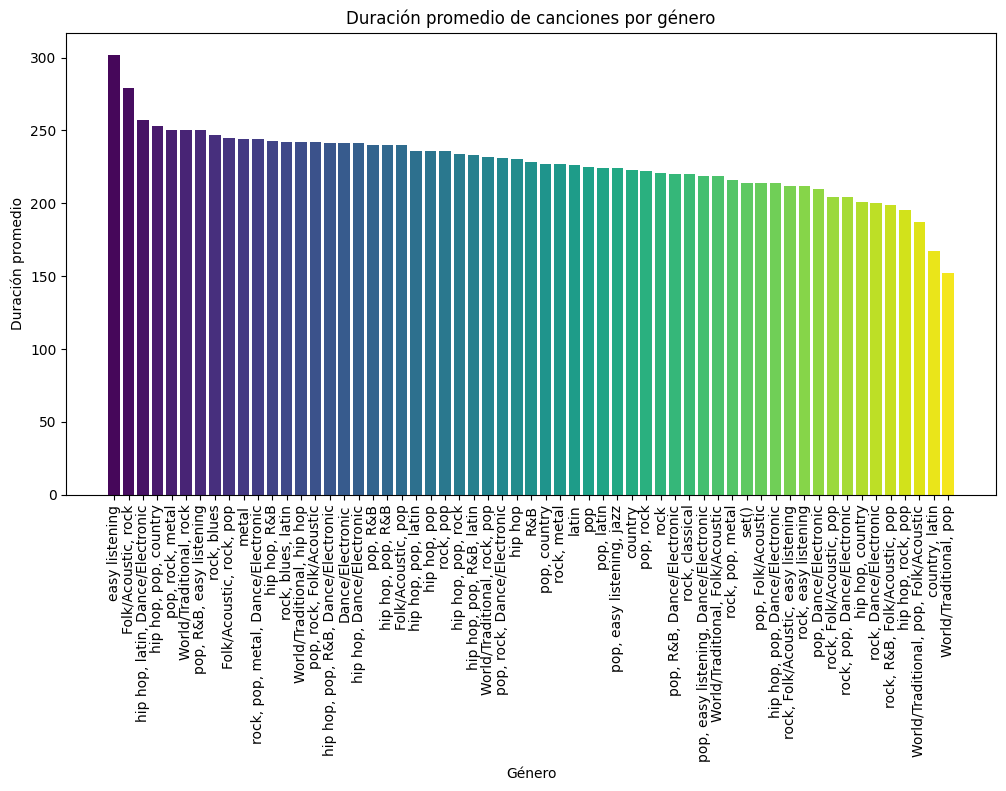

In [57]:
# Agrupar por género y calcular la duración promedio
summarized_data_genre_wise = df.groupby('Genero').agg(avg_duration=('Duracion', 'mean'))
summarized_data_genre_wise = summarized_data_genre_wise.round().astype(int)

# Ordenar por duración promedio en orden descendente
summarized_data_genre_wise = summarized_data_genre_wise.sort_values('avg_duration', ascending=False)

# Crear una paleta de colores gradual
color_palette = sns.color_palette("viridis", len(summarized_data_genre_wise))

# Crear el gráfico de barras con colores gradualmente cambiantes
plt.figure(figsize=(12, 6))
plt.bar(summarized_data_genre_wise.index, summarized_data_genre_wise['avg_duration'], color=color_palette)
plt.xlabel('Género')
plt.ylabel('Duración promedio')
plt.title('Duración promedio de canciones por género')
plt.xticks(rotation=90)
plt.show()

**Géneros con mayor duración:** Observando las barras más altas en el gráfico, es posible identificar los géneros que tienen una duración promedio más larga. Estos géneros tienden a tener canciones más extensas en comparación con otros géneros.Podría estar relacionado con la naturaleza del género, como estructuras más complejas, pasajes instrumentales o desarrollo de narrativas musicales más largas.

**Géneros con menor duración:** Al observar las barras más cortas, se puede identificar los géneros con una duración promedio más corta. Estos géneros suelen tener canciones más breves en comparación con otros géneros. Podría estar relacionado con estructuras más simples, ritmos más rápidos o énfasis en hooks o estribillos pegadizos.

**Variación en la duración:** La variación entre las barras representa la diversidad de duraciones dentro de cada género. Algunos géneros pueden tener una mayor variabilidad en la duración, lo que significa que sus canciones pueden ser tanto largas como cortas. Otros géneros pueden tener una duración más consistente, lo que sugiere una mayor uniformidad en la duración de sus canciones.

In [58]:
duracion_temas = df[['Cancion', 'Artista', 'Genero', 'Duracion']]
duracion_temas = duracion_temas.sort_values('Duracion', ascending=False)


print(duracion_temas)

                                              Cancion            Artista  \
1381                                          Mirrors  Justin Timberlake   
140                                    Another Chance      Roger Sanchez   
706   What Goes Around.../...Comes Around (Interlude)  Justin Timberlake   
760        LoveStoned / I Think She Knows (Interlude)  Justin Timberlake   
242                                        Days Go By        Dirty Vegas   
...                                               ...                ...   
1746                                       Gucci Gang           Lil Pump   
1853                                          changes       XXXTENTACION   
1752                                   Jocelyn Flores       XXXTENTACION   
1939                                           Panini          Lil Nas X   
1931                                    Old Town Road          Lil Nas X   

                Genero  Duracion  
1381               pop       484  
140   Dance/Elect

**La canción más larga** es  Mirrors de Justin Timberlake con 484 segundos y **la más corta** es Old Town Road de Lil Nas X con 113 segundos de duración.

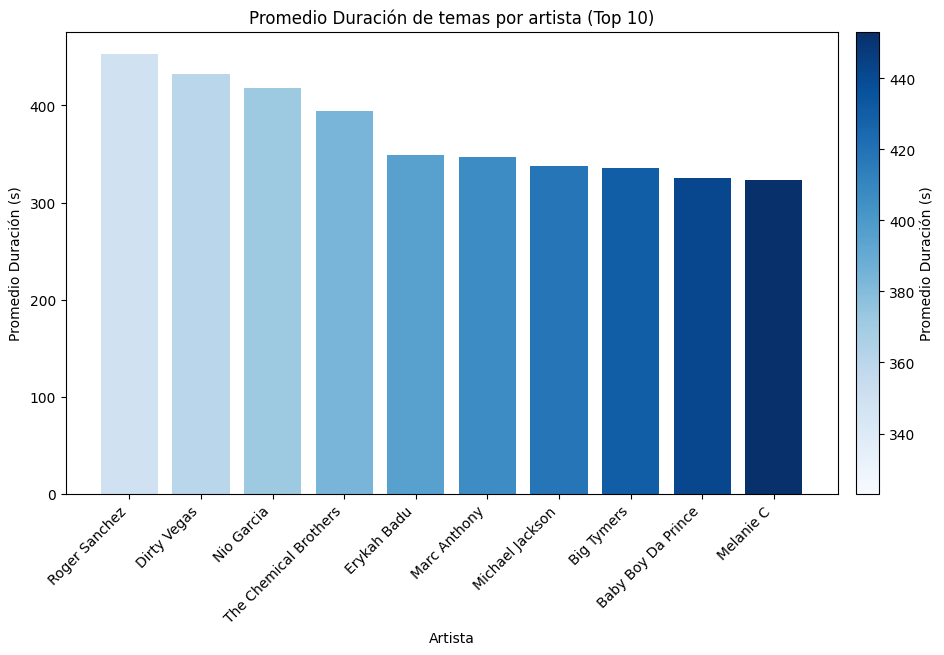

In [62]:
# TOP TEN: Duracion promedio por artista
#Agrupar por artista y calcular el promedio de duración de sus temas
duracion_artistas = duracion_temas.groupby('Artista')['Duracion'].mean()

# Ordenar los artistas por duración descendente y seleccionar los diez primeros
duracion_artistas = duracion_artistas.sort_values(ascending=False).head(10)

# Crear una paleta de colores en degradé
colores = plt.cm.Blues(np.linspace(0.2, 1, len(duracion_artistas)))

# Crear el gráfico de barras con colores en degradé
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(range(len(duracion_artistas)), duracion_artistas, color=colores)
ax.set_title('Promedio Duración de temas por artista (Top 10)')
ax.set_xlabel('Artista')
ax.set_ylabel('Promedio Duración (s)')

# Establecer los valores del eje x y configurar las etiquetas
ax.set_xticks(range(len(duracion_artistas)))
ax.set_xticklabels(duracion_artistas.index, rotation=45, ha='right')

# Agregar una barra de color en degradé para indicar la escala
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=duracion_artistas.min(), vmax=duracion_artistas.max()))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Promedio Duración (s)')

# Mostrar el gráfico
plt.show()

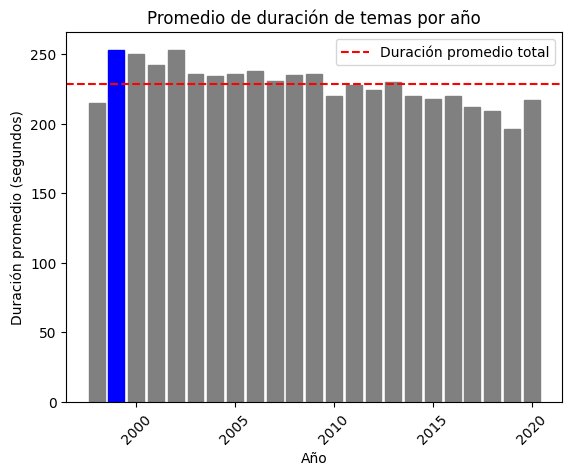

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular el promedio de duración por año
promedio_duracion_anio = df.groupby('Año')['Duracion'].mean().astype(int)

# Obtener el año con la duración máxima
max_duracion_anio = promedio_duracion_anio.idxmax()

# Crear la figura y el eje
fig, ax = plt.subplots()

# Generar el gráfico de barras
bars = ax.bar(promedio_duracion_anio.index, promedio_duracion_anio)

# Resaltar los años de mayor duración con colores diferentes
colors = ['blue' if x == max_duracion_anio else 'gray' for x in promedio_duracion_anio.index]
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Agregar una línea de referencia para la duración promedio total
promedio_total = df['Duracion'].mean()
ax.axhline(promedio_total, color='red', linestyle='--', label='Duración promedio total')

# Establecer etiquetas y título
ax.set_xlabel('Año')
ax.set_ylabel('Duración promedio (segundos)')
ax.set_title('Promedio de duración de temas por año')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar una leyenda con la línea de referencia
ax.legend()

# Mostrar el gráfico
plt.show()

**Al analizar la duración promedio de las canciones desde 1998 hasta 2020, podemos observar lo siguiente:**

Durante los primeros años, como en 1998 y 1999, la duración promedio de las canciones es relativamente más larga, con valores de 215 y 253 segundos respectivamente.

A partir del año 2000, la duración promedio se mantiene en un rango cercano a los 240-250 segundos, con algunas variaciones año tras año.

En general, a lo largo de los años 2000 y 2010, la duración promedio de las canciones tiende a mantenerse relativamente estable en el rango de 230-240 segundos.

A partir del año 2017, se observa una disminución gradual en la duración promedio de las canciones, alcanzando su punto más bajo en 2019 con 196 segundos.

Sin embargo, en el año 2020, la duración promedio muestra un ligero aumento, llegando a 217 segundos.

Estos resultados sugieren que, en general, hubo una tendencia a la disminución de la duración promedio de las canciones desde 2017 hasta 2019, pero con una ligera recuperación en 2020. Es importante tener en cuenta que estos datos se basan en el conjunto de canciones y pueden variar dependiendo de los géneros musicales y las preferencias específicas de cada año.